In [4]:
import numpy as np

A = np.array([[-3, -3, -5],[1, -1, 1],[2, 4, 0]])
B = np.array([[3, 0, 0], [0, -3, 0], [0, 0, 1]])

mul_arr = A @ B
mul_arr

array([[ -9,   9,  -5],
       [  3,   3,   1],
       [  6, -12,   0]])


📌 Matriz TF-IDF original:
       con    corren        el        en      gato    juega        la  \
0  0.49483  0.000000  0.292254  0.000000  0.376331  0.49483  0.376331   
1  0.00000  0.370212  0.655959  0.281556  0.281556  0.00000  0.000000   
2  0.00000  0.000000  0.261940  0.337295  0.000000  0.00000  0.337295   

     parque    pelota     perro     rueda    rápido     suelo  
0  0.000000  0.376331  0.000000  0.000000  0.000000  0.000000  
1  0.370212  0.000000  0.370212  0.000000  0.000000  0.000000  
2  0.000000  0.337295  0.000000  0.443503  0.443503  0.443503  

📌 Matriz después de SVD (2 componentes):
   Componente 1  Componente 2
0      0.754500     -0.172839
1      0.702519      0.688783
2      0.731120     -0.483472


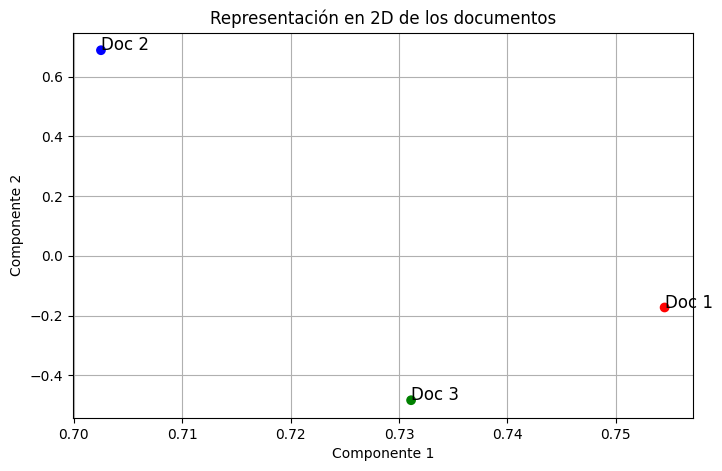

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# 📌 1. Datos de ejemplo (3 documentos)
docs = [
    "El gato juega con la pelota",
    "El perro y el gato corren en el parque",
    "La pelota rueda rápido en el suelo"
]

# 📌 2. Convertimos el texto en matriz TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(docs)

# 📌 3. Aplicamos SVD con 2 componentes
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_tfidf)

# 📌 4. Mostramos la nueva representación
print("\n📌 Matriz TF-IDF original:")
print(pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out()))

print("\n📌 Matriz después de SVD (2 componentes):")
print(pd.DataFrame(X_svd, columns=["Componente 1", "Componente 2"]))

# 📌 5. Graficamos la nueva representación en 2D
plt.figure(figsize=(8,5))
plt.scatter(X_svd[:, 0], X_svd[:, 1], color=['red', 'blue', 'green'])
for i, txt in enumerate(["Doc 1", "Doc 2", "Doc 3"]):
    plt.annotate(txt, (X_svd[i, 0], X_svd[i, 1]), fontsize=12)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Representación en 2D de los documentos")
plt.grid()
plt.show()